In [1]:
import pandas as pd

# Absolute path to the Excel file
file_path = r'C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Surface_Profilometry_Organized_Samples_for_Program.xlsx'

try:
    # Load the Excel file using the correct engine
    data = pd.read_excel(file_path, engine='openpyxl', sheet_name='CTI')  # Adjust sheet_name as per your file

    # Print the first few rows to inspect the data structure
    print(data.head())

except PermissionError:
    print(f"Permission denied: {file_path}. Please make sure the file is not open in another application and that you have the necessary permissions.")
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


    0.000     -230.352    600.281    884.734    3089.420  -130.367   \
0   -242.148   -207.648    504.453    750.344    3151.11   -8.71094   
1   -166.023   -172.430    501.438    857.547    3199.22   10.73440   
2   -101.695   -255.523    715.867    652.141    3315.40   71.92970   
3   -289.008   -260.484    639.734    768.727    3250.43  332.52300   
4   -350.695   -106.633    607.570    677.195    3348.41  496.04700   

    1660.280   2746.160   2126.860   2926.120  
0    1761.20    2936.21    2251.13    2886.02  
1    1856.40    2983.70    2039.06    2742.79  
2    1917.45    3092.99    2161.35    2678.30  
3    1816.10    3214.32    2331.57    2826.95  
4    1925.96    3241.92    2133.00    2783.42  


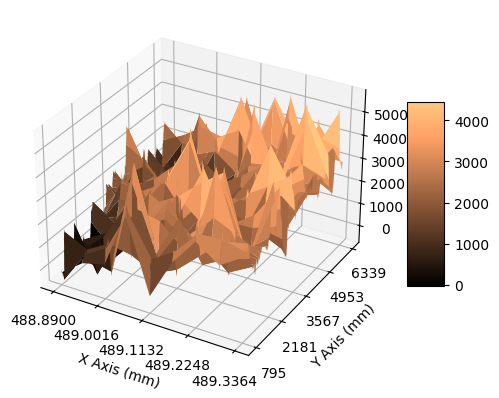

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Z data from Excel sheet
file_path = r'C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Surface_Profilometry_Organized_Samples_for_Program.xlsx'

try:
    # Load data from Excel sheet (assuming Z data is in the first sheet)
    df = pd.read_excel(file_path, sheet_name='CTI', index_col=0)  # Adjust sheet_name as necessary
    
    # Extract Z values from DataFrame
    Z = df.values
    
    # Coordinates and resolutions
    x_coord = 488.89
    y_coord = 795.28
    x_resolution = 0.049603
    y_resolution = 5.5
    
    # Create meshgrid for X and Y based on the shape of Z
    x_points = Z.shape[1]
    y_points = Z.shape[0]
    x_values = np.linspace(x_coord, x_coord + x_points * x_resolution, x_points)
    y_values = np.linspace(y_coord, y_coord + y_points * y_resolution, y_points)
    X, Y = np.meshgrid(x_values, y_values)
    
    # Plotting the 3D surface plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Create the surface plot with a gold colormap
    surf = ax.plot_surface(X, Y, Z, cmap='copper')
    
    # Add a color bar which maps values to colors
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    # Label the axes with resolutions
    ax.set_xlabel('X Axis (mm)')
    ax.set_ylabel('Y Axis (mm)')
    ax.set_zlabel('Z Values')
    
    # Set ticks and labels based on resolution
    ax.set_xticks(np.linspace(x_coord, x_coord + x_points * x_resolution, 5))  # Adjust number of ticks as needed
    ax.set_yticks(np.linspace(y_coord, y_coord + y_points * y_resolution, 5))  # Adjust number of ticks as needed
    
    # Show the plot
    plt.show()

except PermissionError:
    print(f"Permission denied: {file_path}. Please make sure the file is not open in another application and that you have the necessary permissions.")
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


In [19]:
import pandas as pd
import numpy as np
from scipy import stats

# Load Z data from Excel sheet
file_path = r'C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Surface_Profilometry_Organized_Samples_for_Program.xlsx'

try:
    # Load data from Excel sheet (assuming Z data is in the first sheet)
    df = pd.read_excel(file_path, sheet_name='CTI', index_col=0)  # Adjust sheet_name as necessary
    
    # Extract Z values from DataFrame
    Z = df.values
    
    # Calculate surface roughness parameters
    def calculate_surface_roughness(Z):
        # Ra (Arithmetic Average Roughness)
        Ra = np.mean(np.abs(Z - np.mean(Z)))
        
        # RSm (Slope of the material ratio curve)
        gradient, _ = np.gradient(Z)
        RSm = np.mean(gradient)
        
        return Ra, RSm
    
    Ra, RSm = calculate_surface_roughness(Z)
    
    # Calculate waviness parameters
    def calculate_waviness_parameters(Z):
        # Wz (Average Waviness Height)
        valleys = np.partition(Z.flatten(), 5)[:5]
        peaks = np.partition(Z.flatten(), -5)[-5:]
        Wz = np.mean(np.abs(peaks - valleys))
        
        return Wz
    
    Wz = calculate_waviness_parameters(Z)
    
    # Calculate spatial parameters
    def calculate_spatial_parameters(Z):
        # Skewness and Kurtosis
        skewness = stats.skew(Z.flatten())
        kurtosis = stats.kurtosis(Z.flatten())
        
        return skewness, kurtosis
    
    skewness, kurtosis = calculate_spatial_parameters(Z)
    
    # Print calculated parameters
    print(f"Ra (Arithmetic Average Roughness): {Ra}")
    print(f"RSm (Slope of the material ratio curve): {RSm}")
    print(f"Wz (Average Waviness Height): {Wz}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

except PermissionError:
    print(f"Permission denied: {file_path}. Please make sure the file is not open in another application and that you have the necessary permissions.")
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


Ra (Arithmetic Average Roughness): 912.8737931201248
RSm (Slope of the material ratio curve): 1.0047632947530862
Wz (Average Waviness Height): 6290.4716
Skewness: 0.43538218732827305
Kurtosis: 0.15494060563961298
